# 获取数据的统计摘要信息

包括获取数据、通过describe方法计算摘要、通过iloc/loc截取部分数据快照、累计数据、变动率的可视化等等。

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = ts.get_hist_data('300036', start='2018-07-01', end='2018-07-30') #一次性获取全部日k线数据

In [3]:
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-23,24.00,24.63,24.50,23.64,394998.97,1.14,4.88,22.130,21.352,20.767,242604.41,228566.07,220282.24
2018-07-20,21.27,23.36,23.36,20.58,285217.94,2.12,9.98,21.416,21.006,20.479,203027.90,211702.43,208217.12
2018-07-19,20.31,21.53,21.24,20.08,237180.05,0.84,4.12,20.804,20.744,20.248,179878.59,214353.52,200045.24
2018-07-18,21.01,21.11,20.40,20.40,120305.32,-0.75,-3.55,20.672,20.590,20.068,182143.04,210405.44,192780.61
2018-07-17,20.99,21.16,21.15,19.98,175319.77,0.22,1.05,20.566,20.501,19.947,209358.56,216870.16,191965.90
2018-07-16,20.21,21.59,20.93,20.15,197116.41,0.63,3.10,20.574,20.457,19.744,214527.74,219714.13,188143.40
2018-07-13,20.57,21.00,20.30,19.92,169471.41,-0.28,-1.36,20.596,20.361,19.602,220376.96,215256.89,183077.62
2018-07-12,19.80,21.34,20.58,19.67,248502.31,0.71,3.57,20.684,20.370,19.516,248828.44,222424.89,180589.74
2018-07-11,20.43,20.67,19.87,19.42,256382.91,-1.32,-6.23,20.508,20.258,19.405,238667.83,212641.17,171870.55


获得统计摘要信息。

In [4]:
df.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,20.646875,21.482500,20.949375,20.116875,222669.208125,0.256875,1.239375,20.566000,20.235500,19.563000,210462.123125,203674.843750,171111.852500
std,1.024218,1.074048,1.299418,1.038504,67110.126874,0.900768,4.285577,0.552836,0.596444,0.599813,21720.301506,20990.790536,29189.834901
min,19.470000,20.450000,19.510000,19.230000,120305.320000,-1.320000,-6.230000,20.008000,19.031000,18.768000,179878.590000,156572.680000,126548.200000
25%,20.167500,20.932500,20.217500,19.555000,182544.332500,-0.315000,-1.535000,20.124000,19.901000,19.058750,193723.322500,199983.097500,147260.652500
50%,20.500000,21.140000,20.725000,19.950000,202462.595000,0.260000,1.250000,20.537000,20.319000,19.460500,209747.685000,211850.420000,176230.145000
75%,20.907500,21.610000,21.160000,20.405000,250472.460000,0.765000,3.812500,20.675000,20.523250,19.977250,224511.445000,215660.207500,192169.577500
max,24.000000,24.630000,24.500000,23.640000,394998.970000,2.120000,9.980000,22.130000,21.352000,20.767000,248828.440000,228566.070000,220282.240000


按照行列顺序截取数据快照。

In [27]:
df.iloc[0:,6:10]

,p_change,ma5,ma10,ma20
date,,,,
2018-07-23,4.88,22.130,21.352,20.767
2018-07-20,9.98,21.416,21.006,20.479
2018-07-19,4.12,20.804,20.744,20.248
2018-07-18,-3.55,20.672,20.590,20.068
2018-07-17,1.05,20.566,20.501,19.947
2018-07-16,3.10,20.574,20.457,19.744
2018-07-13,-1.36,20.596,20.361,19.602
2018-07-12,3.57,20.684,20.370,19.516
2018-07-11,-6.23,20.508,20.258,19.405


按照行列标签值截取数据快照。

In [18]:
df.loc[:,['open','close','volume']].mean()

open          20.646875
close         20.949375
volume    222669.208125
dtype: float64

In [19]:
df.loc['2018-07-24':'2018-07-10',['open','close','volume']].mean()

open          20.947
close         21.352
volume    228566.073
dtype: float64

### 筛选数据。

整体筛选。

In [29]:
df[df < 0]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-18,NaN,NaN,NaN,NaN,NaN,-0.75,-3.55,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-13,NaN,NaN,NaN,NaN,NaN,-0.28,-1.36,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-11,NaN,NaN,NaN,NaN,NaN,-1.32,-6.23,NaN,NaN,NaN,NaN,NaN,NaN


按照列值筛选。

In [30]:
df[df.price_change > 0]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-23,24.00,24.63,24.50,23.64,394998.97,1.14,4.88,22.130,21.352,20.767,242604.41,228566.07,220282.24
2018-07-20,21.27,23.36,23.36,20.58,285217.94,2.12,9.98,21.416,21.006,20.479,203027.90,211702.43,208217.12
2018-07-19,20.31,21.53,21.24,20.08,237180.05,0.84,4.12,20.804,20.744,20.248,179878.59,214353.52,200045.24
2018-07-17,20.99,21.16,21.15,19.98,175319.77,0.22,1.05,20.566,20.501,19.947,209358.56,216870.16,191965.90
2018-07-16,20.21,21.59,20.93,20.15,197116.41,0.63,3.10,20.574,20.457,19.744,214527.74,219714.13,188143.40
2018-07-12,19.80,21.34,20.58,19.67,248502.31,0.71,3.57,20.684,20.370,19.516,248828.44,222424.89,180589.74
2018-07-10,20.88,21.67,21.19,20.46,201165.64,0.15,0.71,20.436,20.277,19.334,224381.75,205605.51,162626.66
2018-07-09,20.69,21.12,21.04,20.42,226362.55,0.30,1.45,20.340,20.181,19.190,224900.53,211998.41,158078.63
2018-07-06,19.47,21.67,20.74,19.34,311728.81,1.04,5.28,20.126,19.951,19.084,210136.81,204731.81,150349.86


In [48]:
df[df.price_change < 0]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-18,21.01,21.11,20.40,20.40,120305.32,-0.75,-3.55,20.672,20.590,20.068,182143.04,210405.44,192780.61
2018-07-13,20.57,21.00,20.30,19.92,169471.41,-0.28,-1.36,20.596,20.361,19.602,220376.96,215256.89,183077.62
2018-07-11,20.43,20.67,19.87,19.42,256382.91,-1.32,-6.23,20.508,20.258,19.405,238667.83,212641.17,171870.55
2018-07-04,20.60,20.61,19.51,19.23,184952.52,-1.20,-5.79,20.008,19.545,18.950,186614.52,175155.78,133121.67
2018-07-02,20.38,20.45,19.97,19.68,152543.95,-0.42,-2.06,20.022,19.031,18.768,199096.28,156572.68,126548.20


### 变动的累记与可视化。
#### 累加数据。

In [34]:
df2 = df.sort_index(ascending=True).apply(np.cumsum)

In [36]:
df2

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-02,20.38,20.45,19.97,19.68,152543.95,-0.42,-2.06,20.022,19.031,18.768,199096.28,156572.68,126548.20
2018-07-03,40.42,41.41,40.68,39.28,356303.50,0.32,1.65,40.140,38.424,37.691,385925.55,323634.33,258647.37
2018-07-04,61.02,62.02,60.19,58.51,541256.02,-0.88,-4.14,60.148,57.969,56.641,572540.07,498790.11,391769.04
2018-07-05,80.72,82.87,79.89,77.81,738955.24,-0.69,-3.17,80.204,77.720,75.624,768561.41,684527.07,529762.07
2018-07-06,100.19,104.54,100.63,97.15,1050684.05,0.35,2.11,100.330,97.671,94.708,978698.22,889258.88,680111.93
2018-07-09,120.88,125.66,121.67,117.57,1277046.60,0.65,3.56,120.670,117.852,113.898,1203598.75,1101257.29,838190.56
2018-07-10,141.76,147.33,142.86,138.03,1478212.24,0.80,4.27,141.106,138.129,133.232,1427980.50,1306862.80,1000817.22
2018-07-11,162.19,168.00,162.73,157.45,1734595.15,-0.52,-1.96,161.614,158.387,152.637,1666648.33,1519503.97,1172687.77
2018-07-12,181.99,189.34,183.31,177.12,1983097.46,0.19,1.61,182.298,178.757,172.153,1915476.77,1741928.86,1353277.51


#### 变动及其累计的可视化。

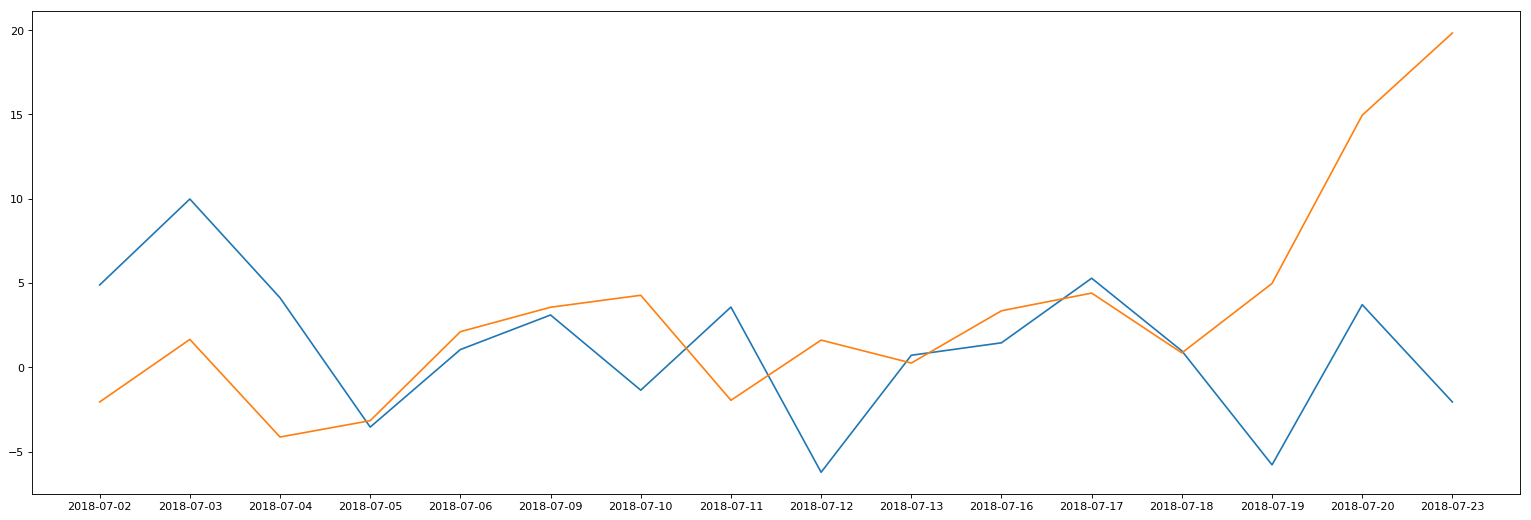

In [45]:
#创建一个画布对象。一个画布可以有多幅子图。
fig=plt.figure(figsize=(24,8), dpi=80)

#在画布中创建一个子图，指定一行、一列的第一幅。
p1=fig.add_subplot(1,1,1)

#绘制第一条曲线。
p1.plot(df2.index,df['p_change'])

#绘制第二条曲线。
p1.plot(df2.index,df2['p_change'])

#显示图形。
plt.show()